## SDN-DoS


In [48]:
dataFile = 'data.csv'

In [49]:
import pandas as pd
df = pd.read_csv(dataFile, delimiter=',')

In [50]:
print(df.head())

   Source IP  Destination IP  Protocol  Switch  P1  P2  P3  P4  P1 Rx Packet  \
0          2               9         0       1   0   1   2   3             0   
1          2               9         0       3   0   1   2   3             0   
2          2               9         0       2   0   1   2   3             0   
3          2               9         0       5   0   1   2   3             0   
4          2               9         0       4   0   1   2   3             0   

   P1 Tx Packet  ...  P2 Tx Bytes  P3 Rx Packet  P3 Tx Packet  P3 Rx Bytes  \
0             0  ...     10554792          5649          6332       415772   
1             0  ...     10826096           615          9575        43934   
2             0  ...     10557817          4922          6706       364619   
3             0  ...       433973          4921          6116       364522   
4             0  ...       744903           621          9931        44130   

   P3 Tx Bytes  P4 Rx Packet  P4 Tx Packet  P4 Rx 

In [51]:
import func as fx

In [52]:
def filterByProtocol(protocol):
    return df[(df.Protocol == fx.protocol_list.index(protocol))]

tcp = filterByProtocol("tcp")
udp = filterByProtocol("udp")
icmp = filterByProtocol("icmp")

In [53]:
controllerNode = 9
clientNodes = [ node for node in range(1, controllerNode)]

In [54]:
clientNodes

[1, 2, 3, 4, 5, 6, 7, 8]

### TCP Analysis

In [55]:
tcp

,Source IP,Destination IP,Protocol,Switch,P1,P2,P3,P4,P1 Rx Packet,P1 Tx Packet,...,P2 Tx Bytes,P3 Rx Packet,P3 Tx Packet,P3 Rx Bytes,P3 Tx Bytes,P4 Rx Packet,P4 Tx Packet,P4 Rx Bytes,P4 Tx Bytes,Label
1036,7,9,1,1,0,1,2,3,0,0,...,10596093,6080,6764,456122,495680,155094,261464,10240180,10997495882,0
1037,7,9,1,3,0,1,2,3,0,0,...,10840470,720,9744,53888,741042,159867,256880,10580568,10997116800,0
1038,7,9,1,2,0,1,2,3,0,0,...,10580568,5147,6956,385593,496443,160007,257809,10596093,10997186504,0
1039,7,9,1,5,0,1,2,3,0,0,...,456865,5139,6355,384698,457380,6764,6080,495680,456122,0
1040,7,9,1,4,0,1,2,3,0,0,...,759221,721,10095,53594,759003,6956,5147,496443,385593,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8913,7,9,1,2,0,1,2,3,0,0,...,236376211,5695090,3073897,270663881224,203242127,6641956,12241730,438696475,579875738408,1
8914,7,9,1,5,0,1,2,3,0,0,...,199467950,6304321,3486088,296674085971,230398731,6496285,11917278,429058406,564229097075,1
8915,7,9,1,4,0,1,2,3,0,0,...,98918939,2943322,1595270,139965907188,105672411,3073897,5695090,203242127,270663881224,1
8916,7,9,1,7,0,1,2,3,0,0,...,102394330,3494125,1954249,164213263606,129315558,3486315,6304928,230413713,296707853465,1


In [56]:
dataPath = 'data/'

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def analyzeField(protoLabel, field, dataN, dataB, n1, n2):
    # dealing with outliers
    minDataB = np.min(dataB[field])
    dataN = dataN[(dataN[field] < minDataB)]
    #print(dataN)
    
    allData = pd.concat([dataN, dataB])
    allData.to_csv(dataPath + protoLabel + '_' + field.replace(' ', '_') + '.csv', sep=',', encoding='utf-8', index=False)
    #print(allData)
    
    x1 = np.linspace(1, len(dataN[field]), len(dataN[field]))
    x2 = np.linspace(1, len(dataB[field]), len(dataB[field]))
    plt.figure() 
    plt.plot(x1, dataN[field], 'b*')
    plt.plot(x2, dataB[field], 'r*')
    plt.title(protoLabel + ' <=> ' + field + ' <=> ' + str(n1) + ' : ' + str(n2))
    plt.show()
    
def node2NodeAnalysis(protoLabel, data, n1, n2):
    dataN = data[(data.Label == 0)]
    dataB = data[(data.Label == 1)]
    dataNSample = dataN[(dataN['Source IP'] == n1) & (dataN['Destination IP'] == n2)].iloc[:, 12:]
    dataNSample
    
    dataBSample = dataB[(dataB['Source IP'] == n1) & (dataB['Destination IP'] == n2)].iloc[:, 12:]
    dataBSample
    
    for field in dataNSample.columns[:-1]:
        analyzeField(protoLabel, field, dataN, dataB, n1, n2)

In [57]:
def runNodeScenario(protoLabel, data):
    for node in clientNodes:
        node2NodeAnalysis(protoLabel, data, node, controllerNode)

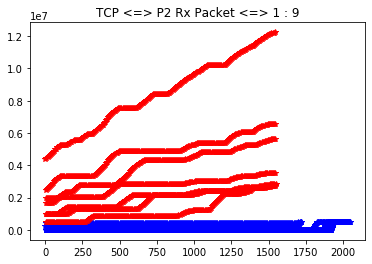

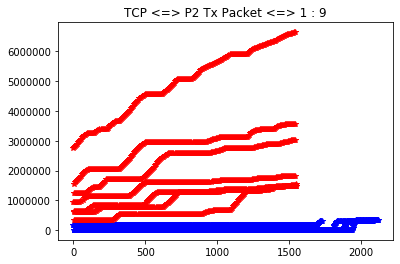

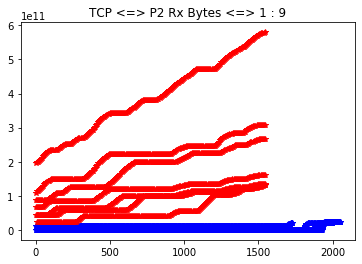

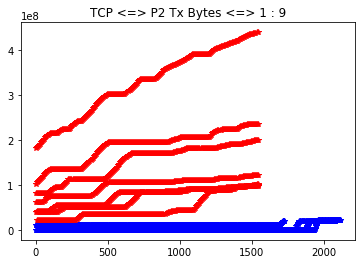

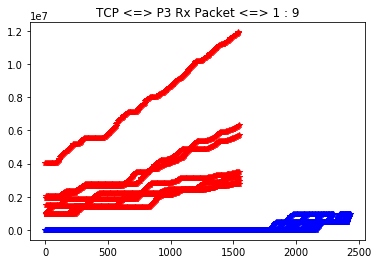

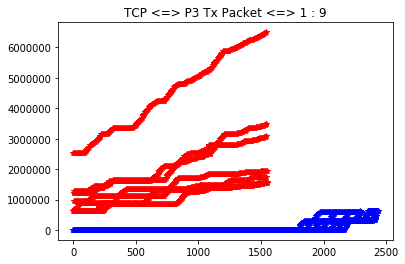

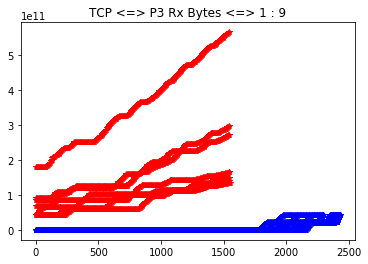

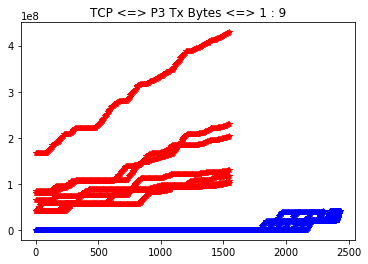

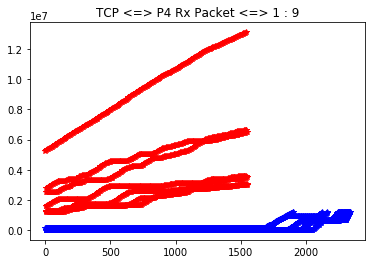

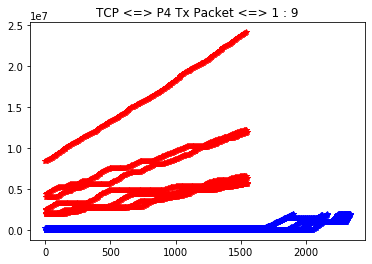

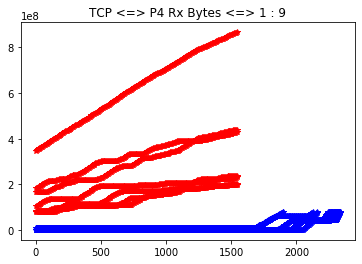

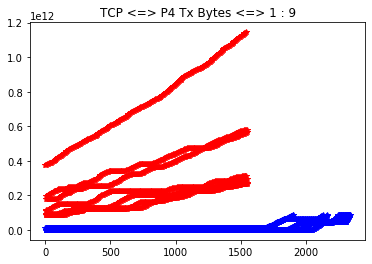

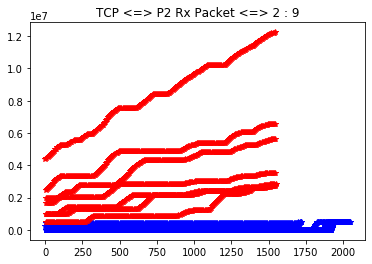

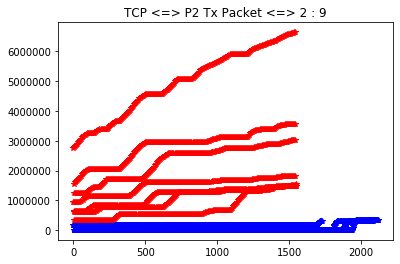

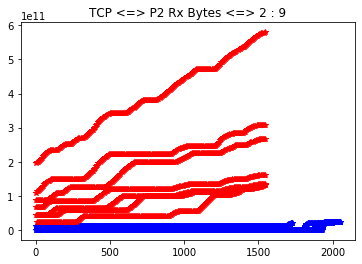

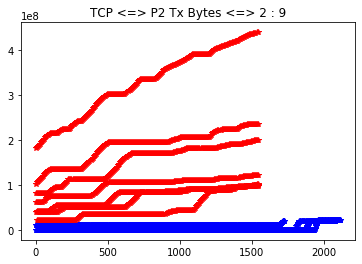

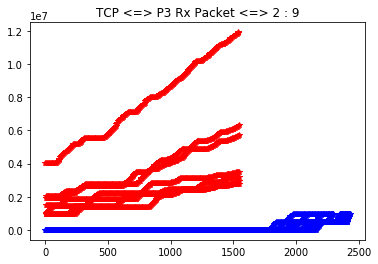

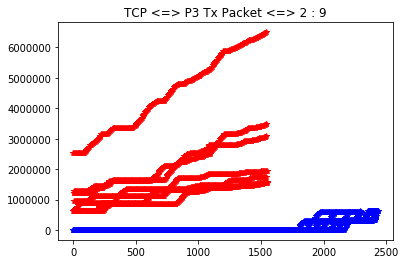

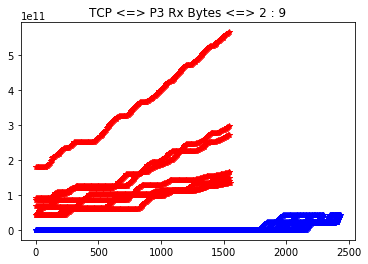

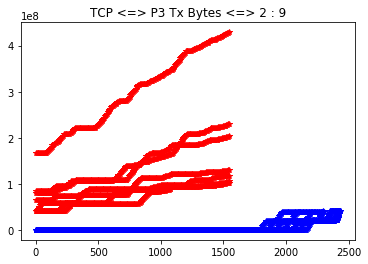

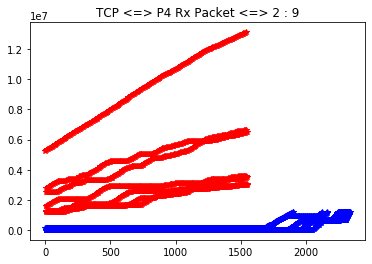

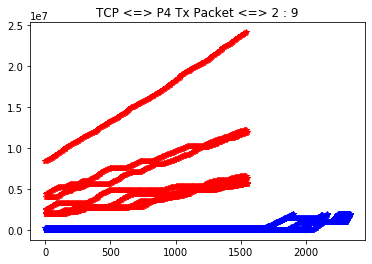

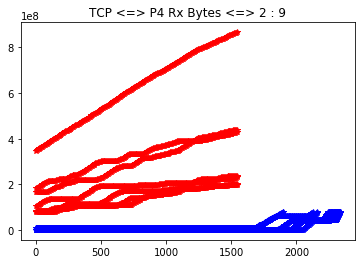

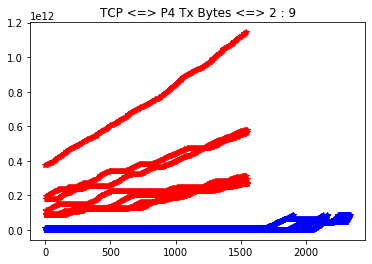

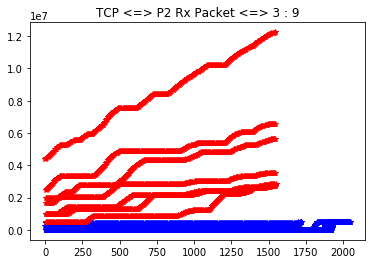

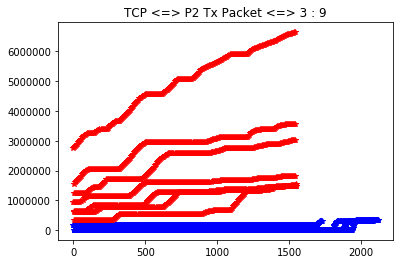

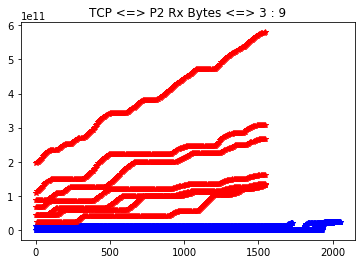

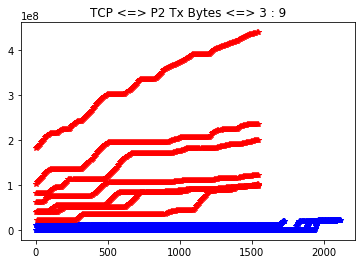

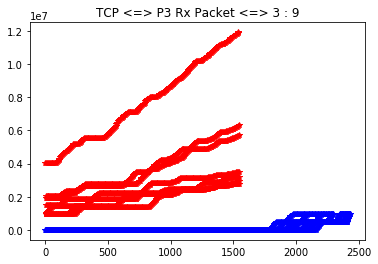

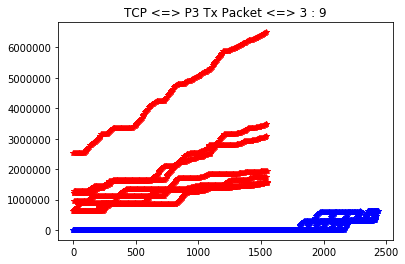

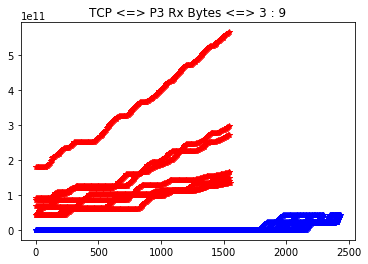

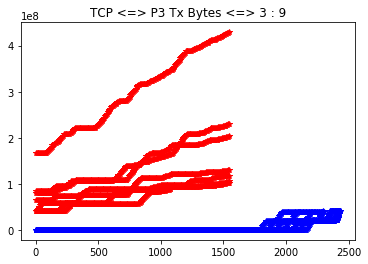

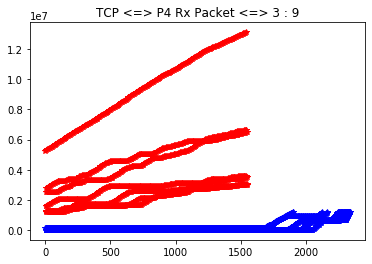

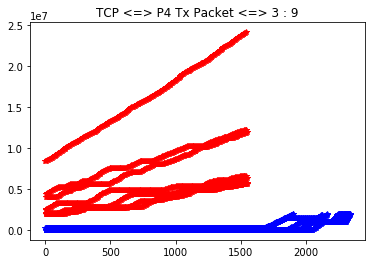

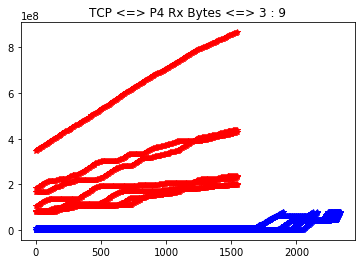

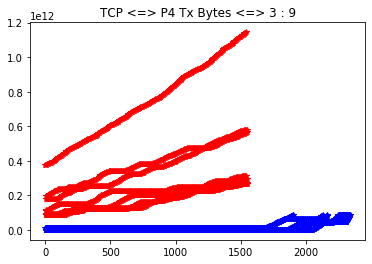

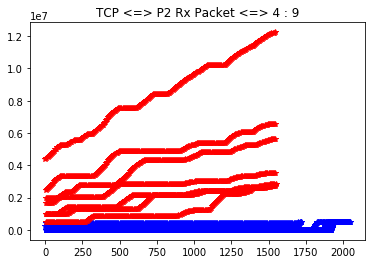

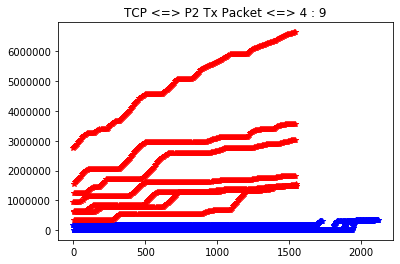

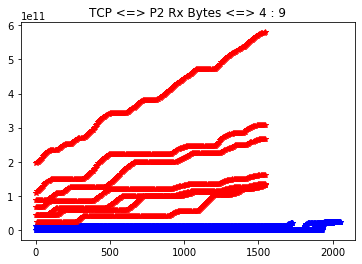

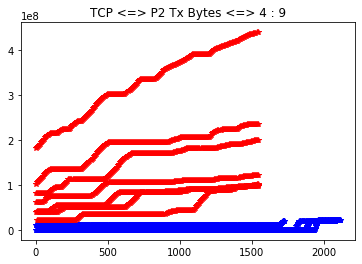

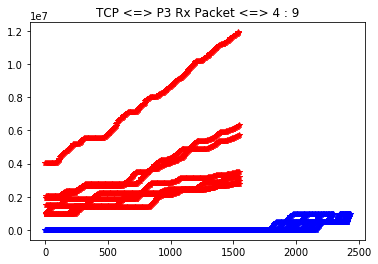

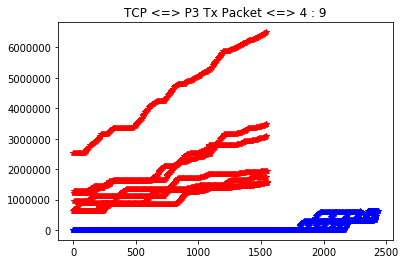

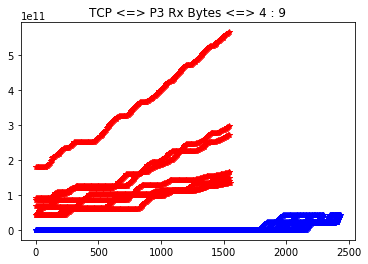

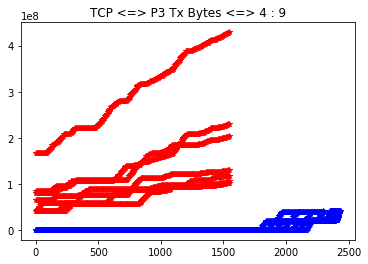

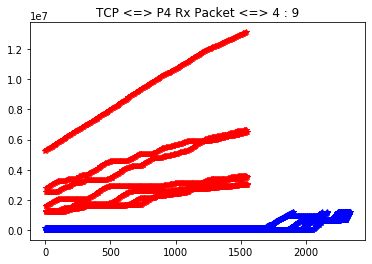

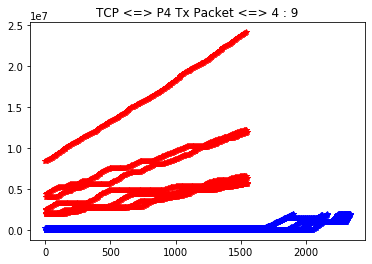

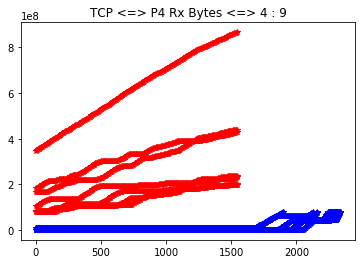

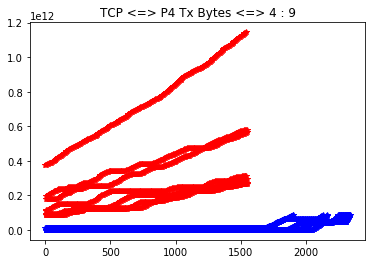

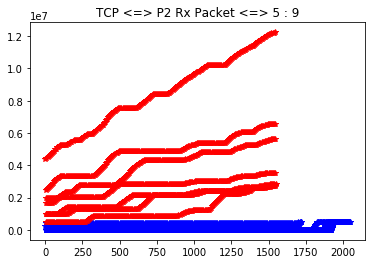

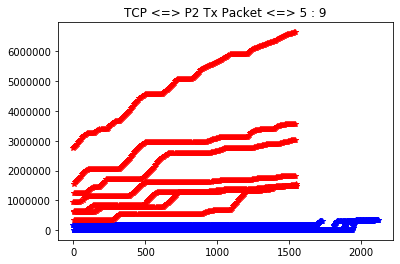

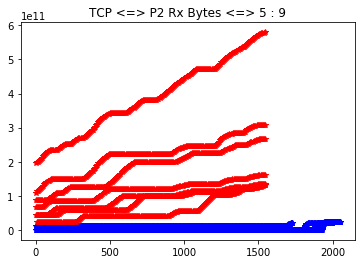

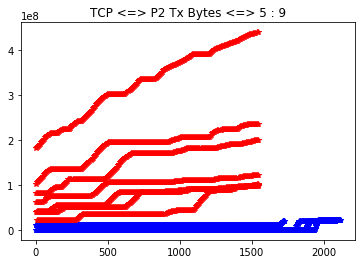

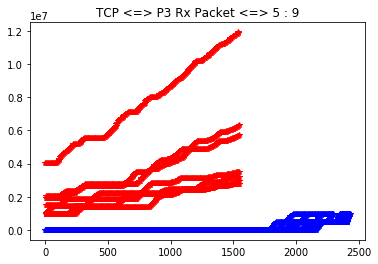

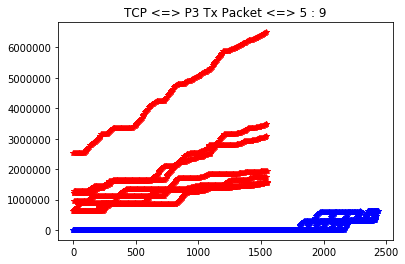

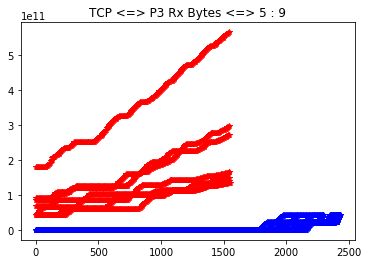

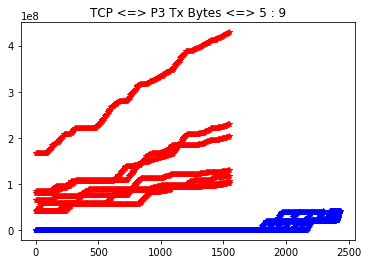

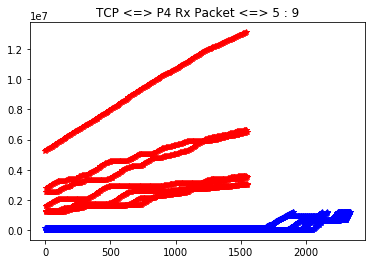

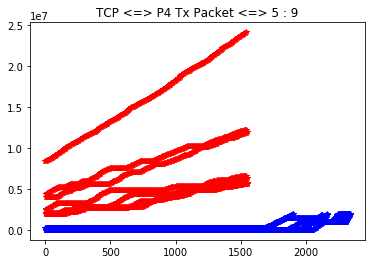

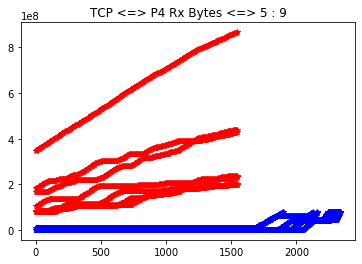

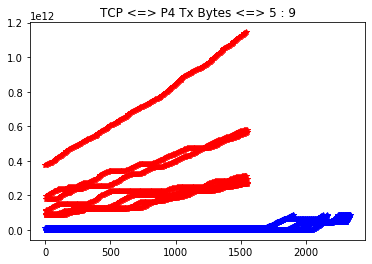

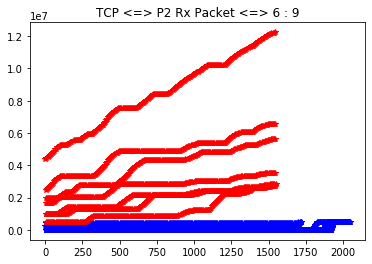

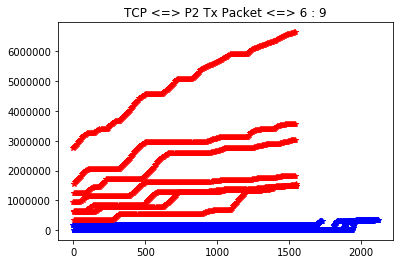

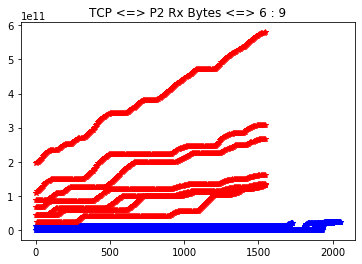

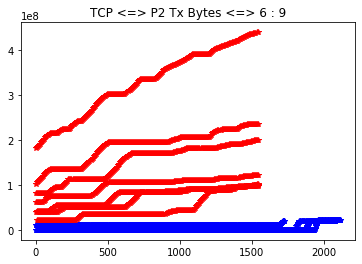

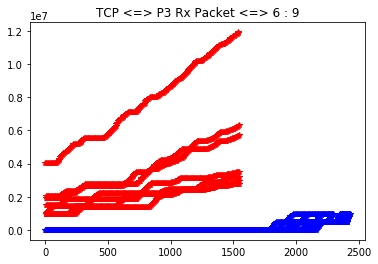

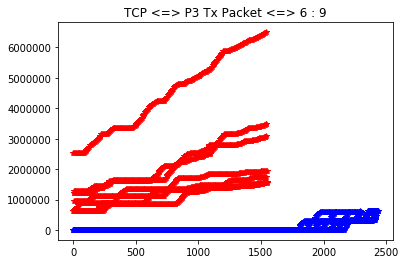

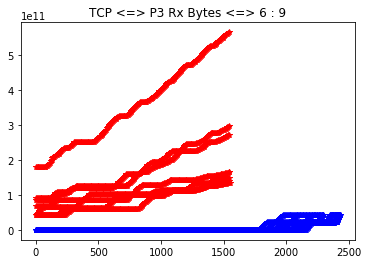

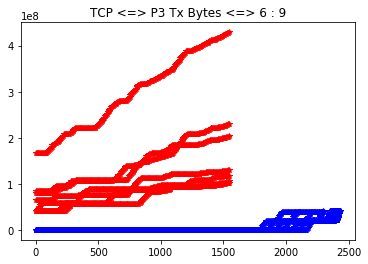

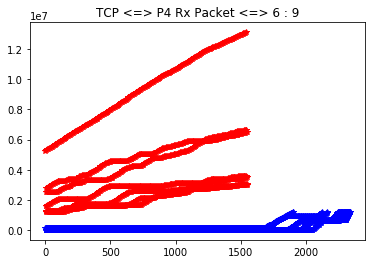

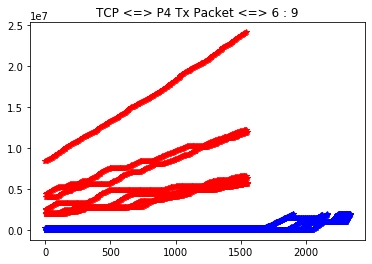

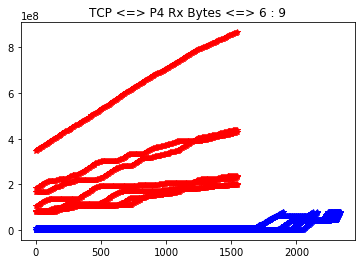

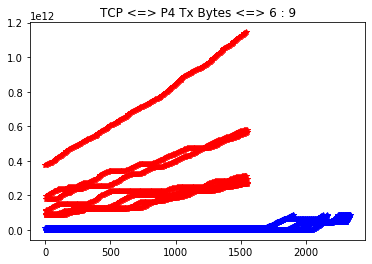

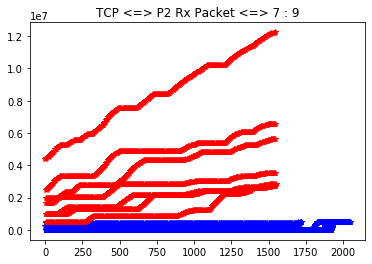

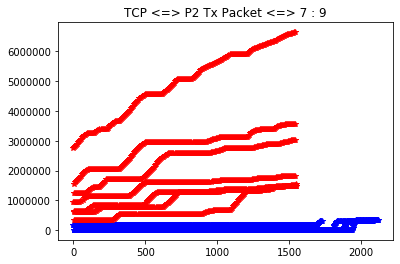

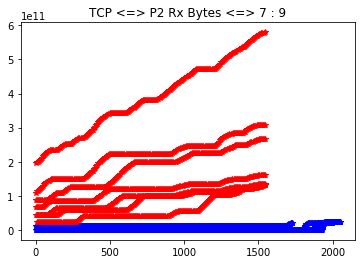

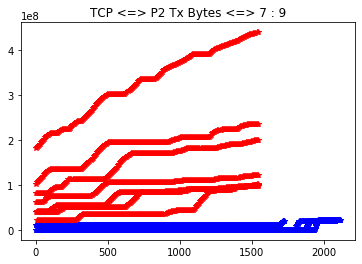

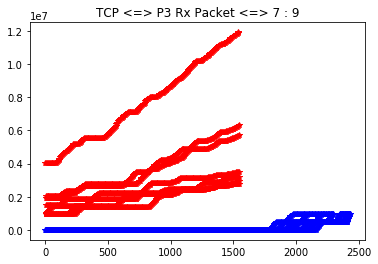

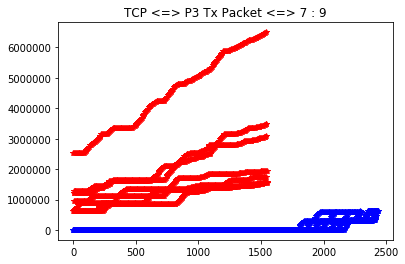

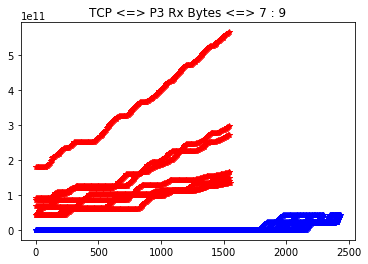

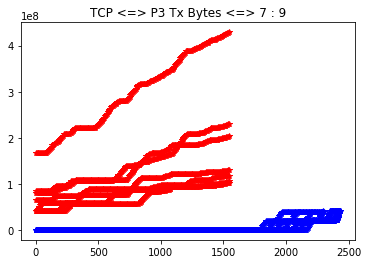

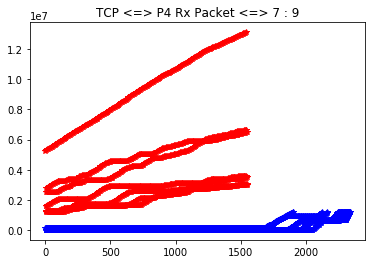

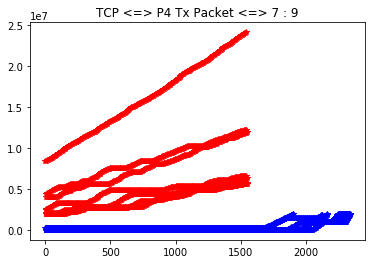

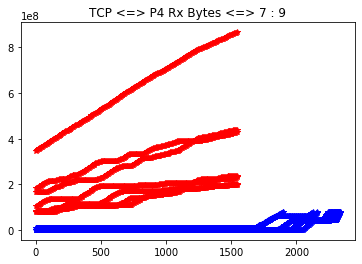

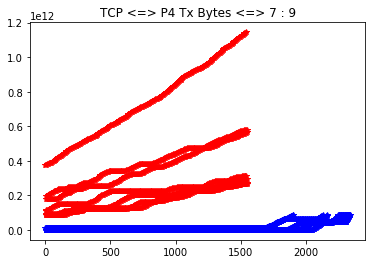

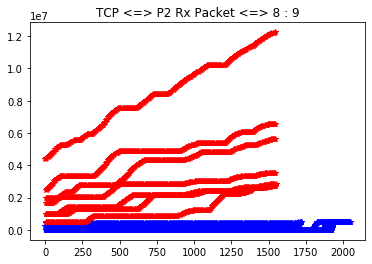

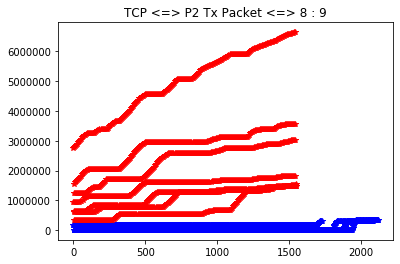

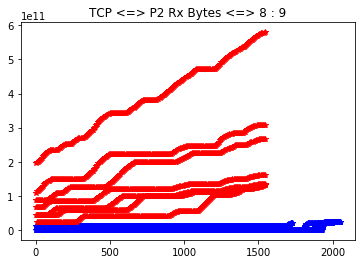

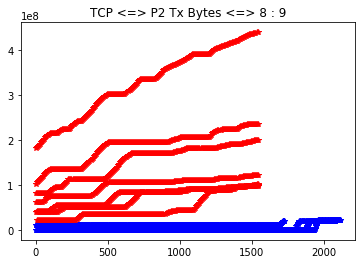

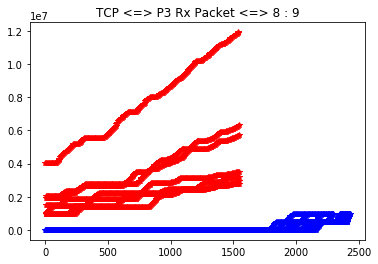

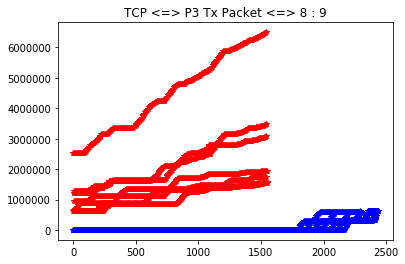

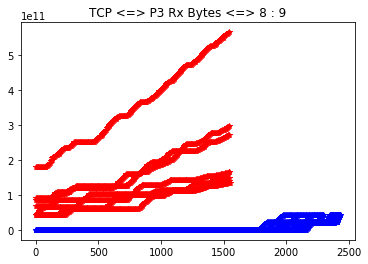

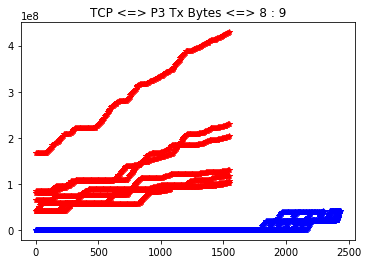

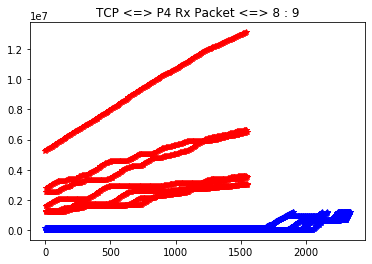

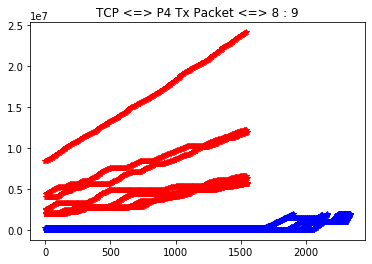

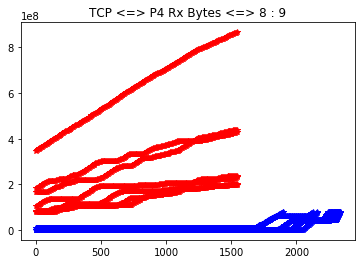

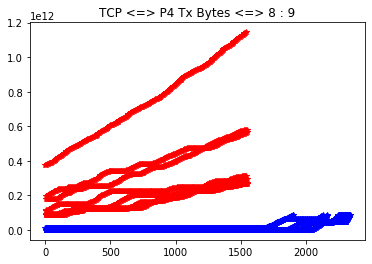

In [58]:
runNodeScenario('TCP', tcp)

## UDP

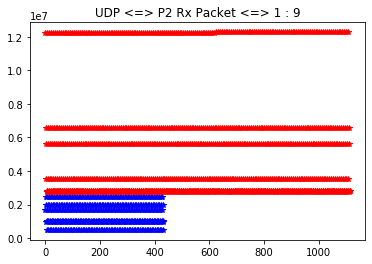

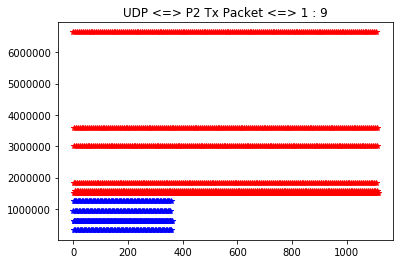

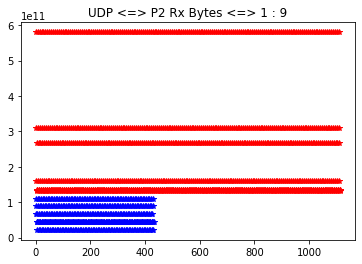

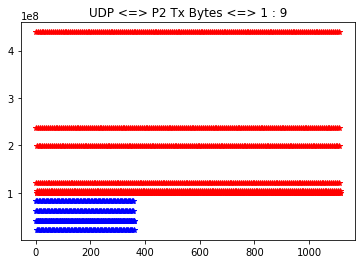

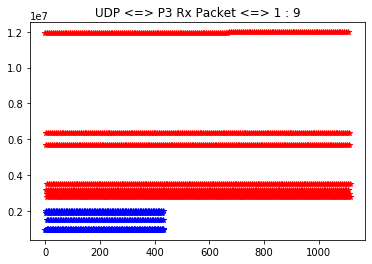

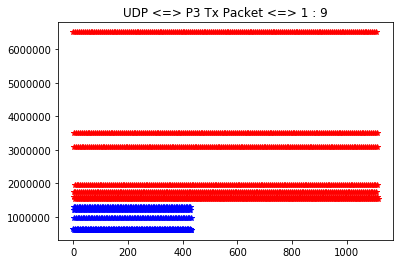

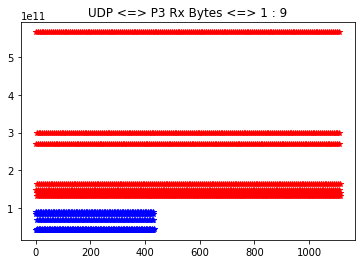

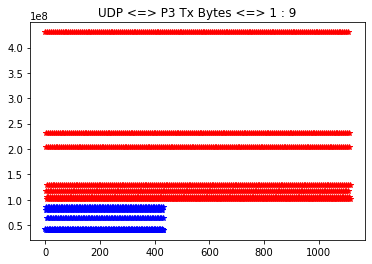

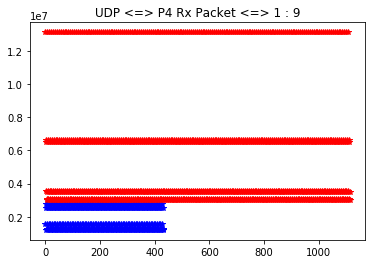

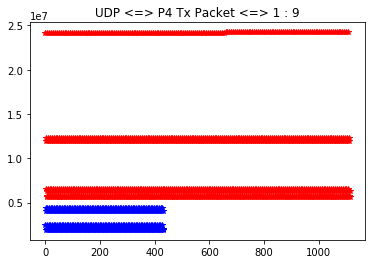

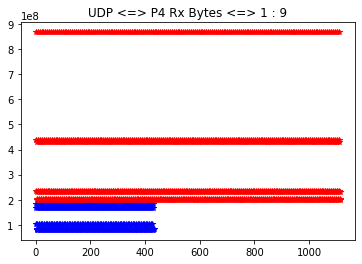

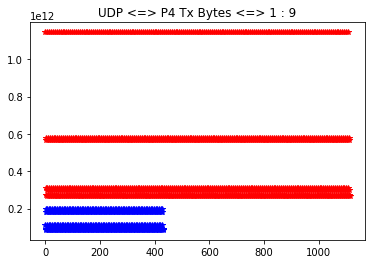

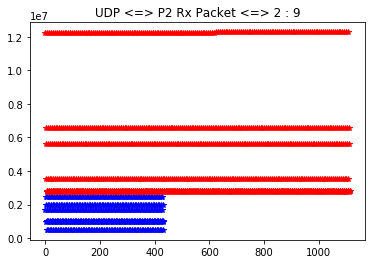

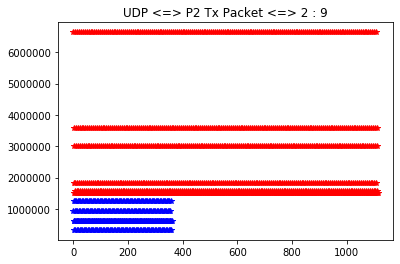

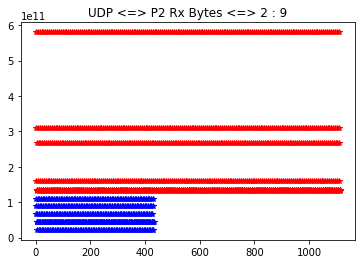

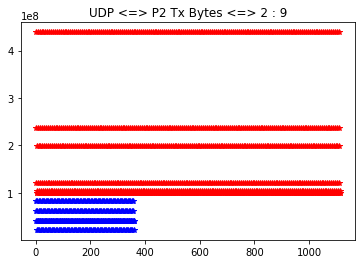

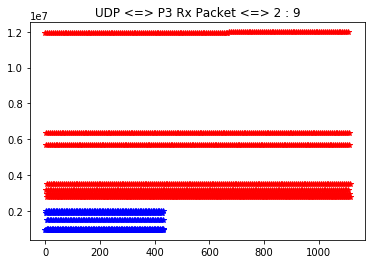

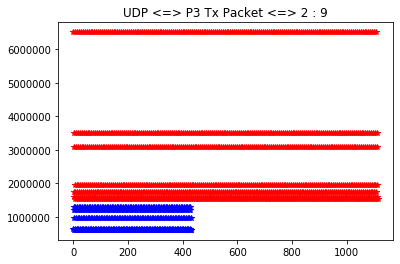

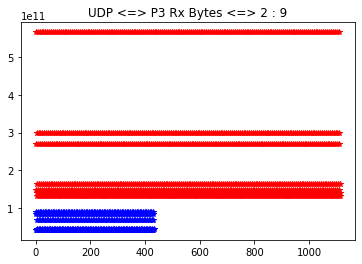

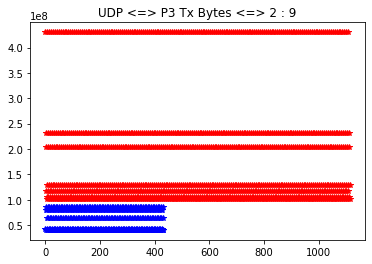

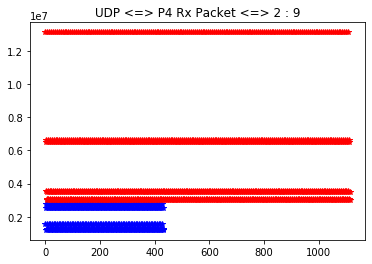

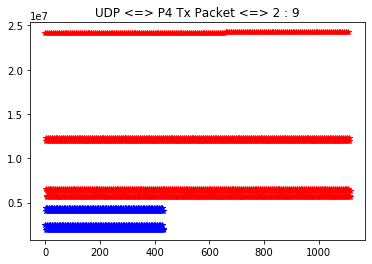

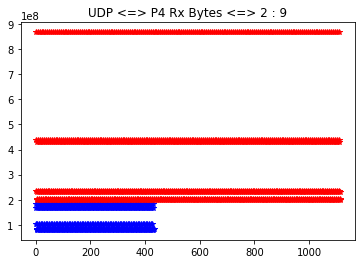

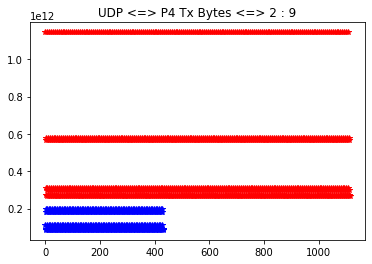

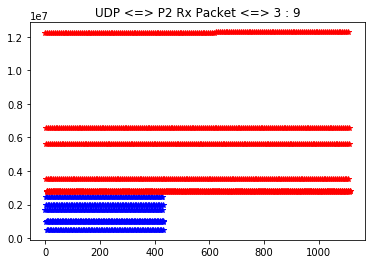

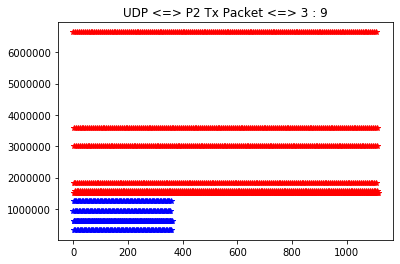

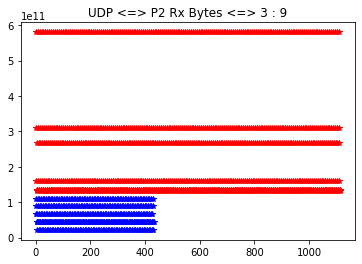

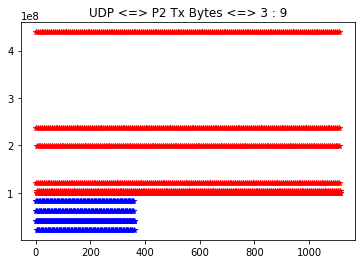

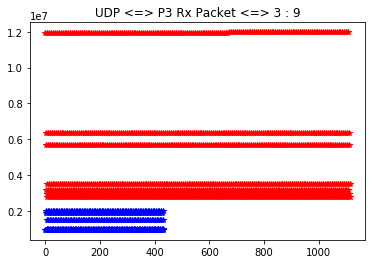

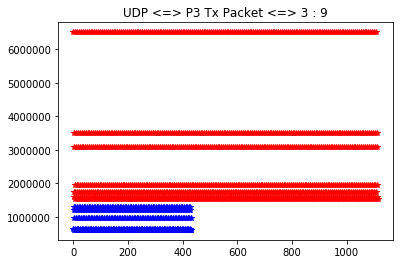

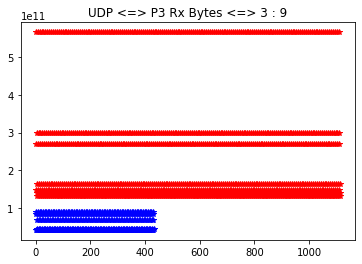

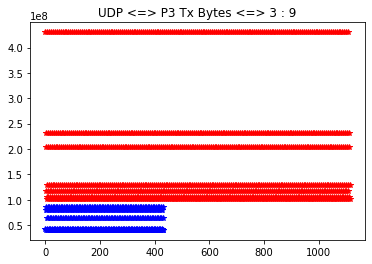

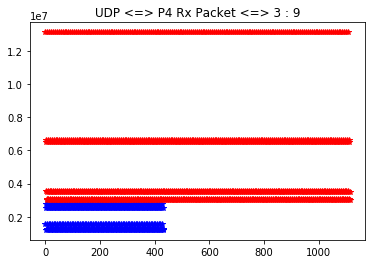

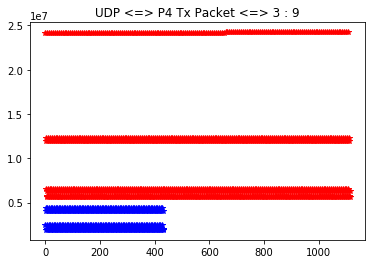

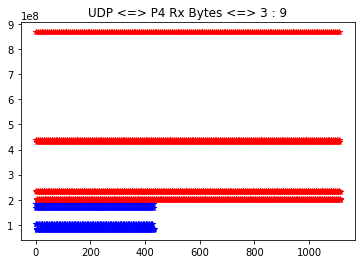

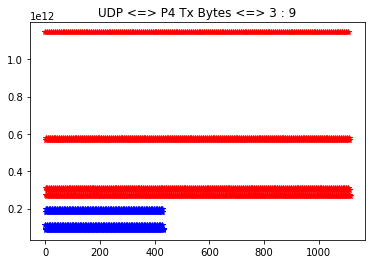

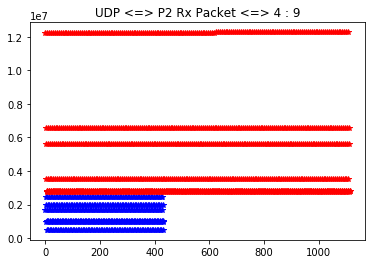

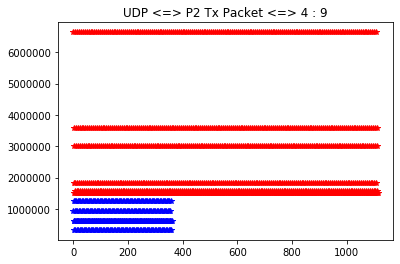

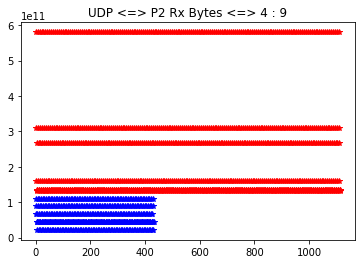

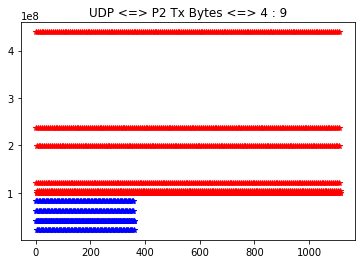

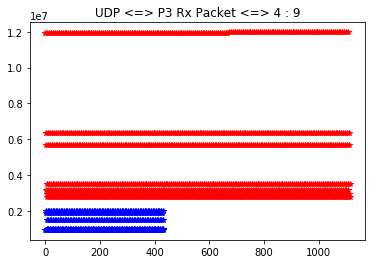

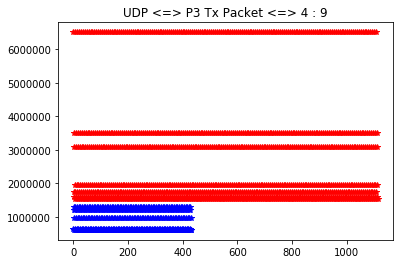

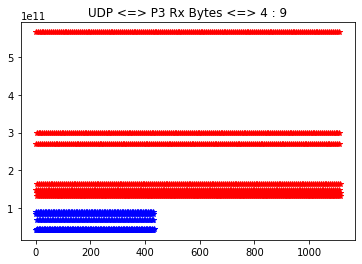

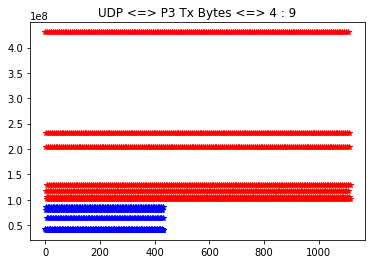

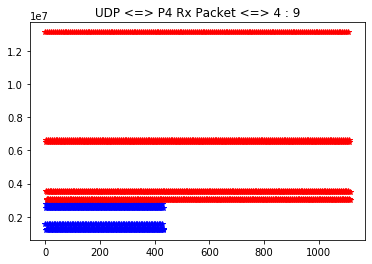

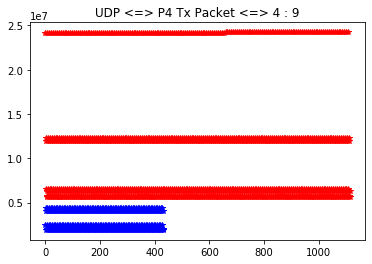

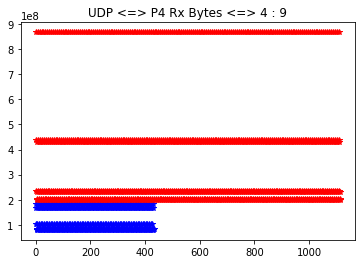

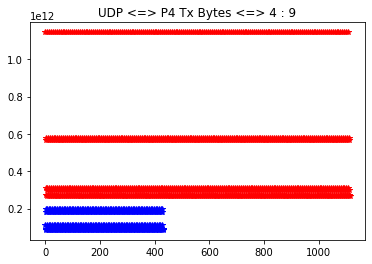

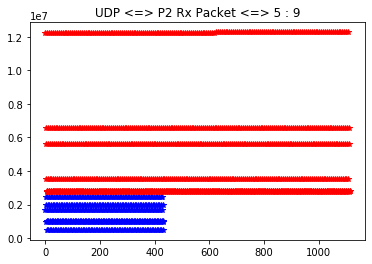

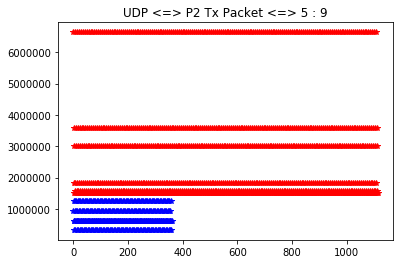

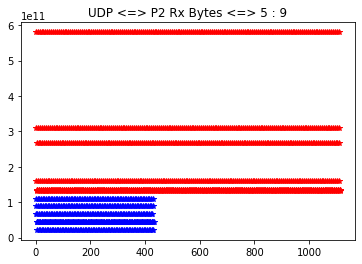

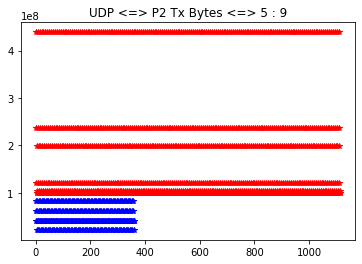

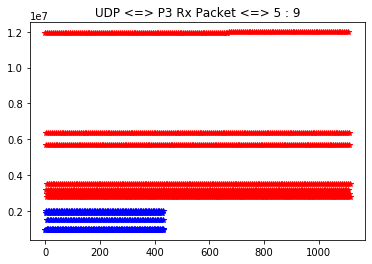

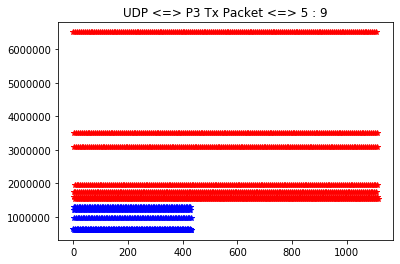

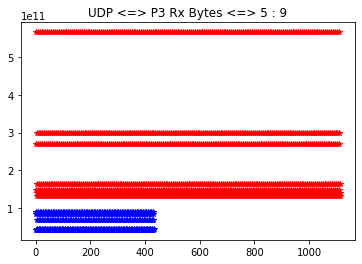

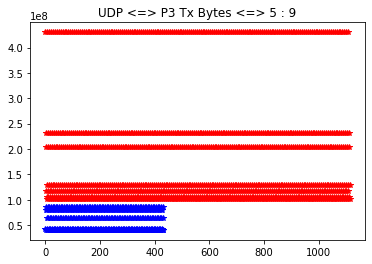

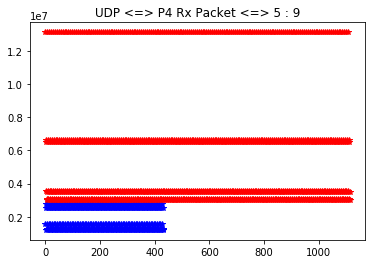

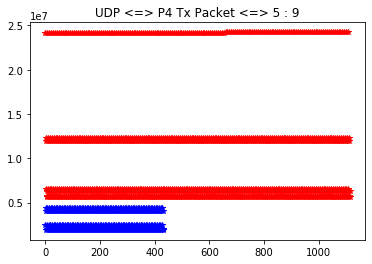

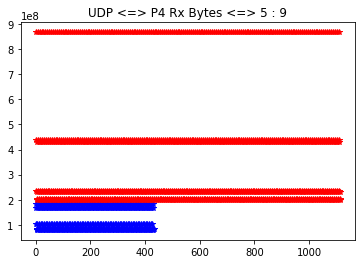

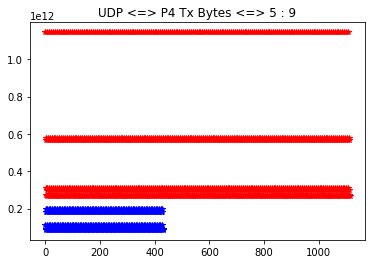

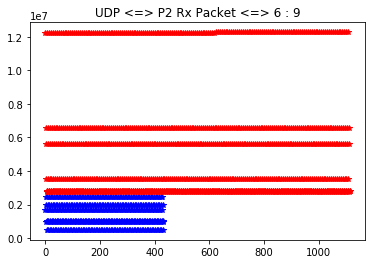

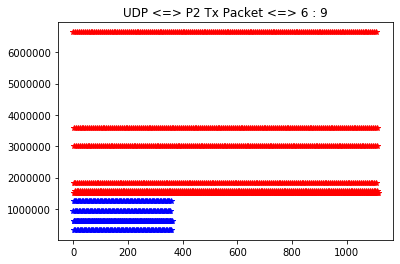

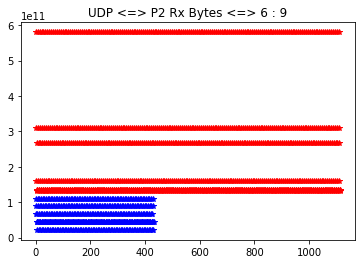

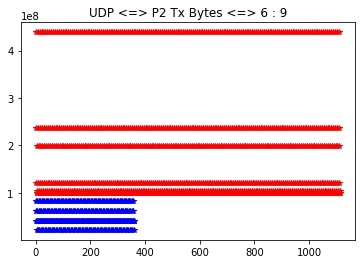

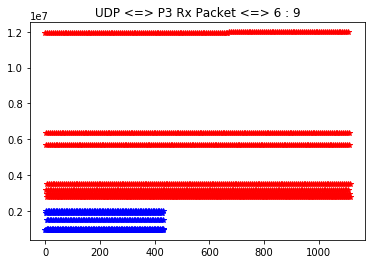

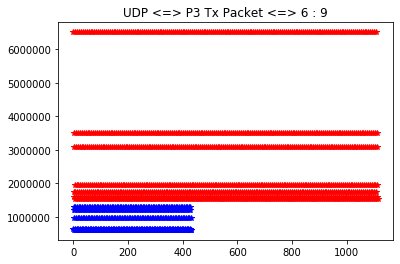

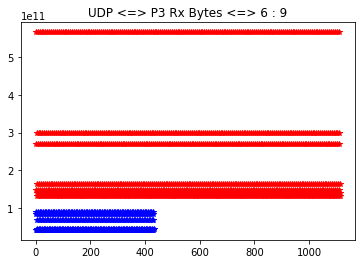

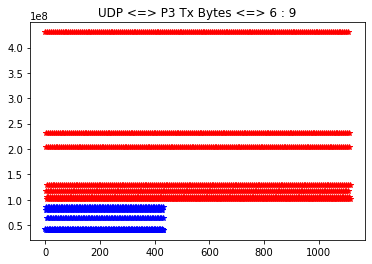

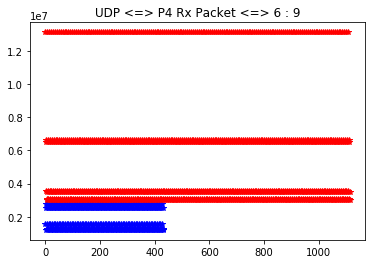

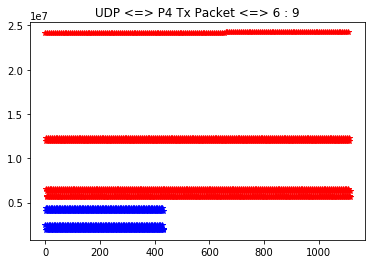

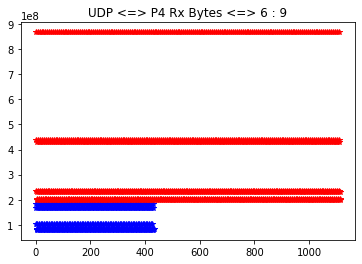

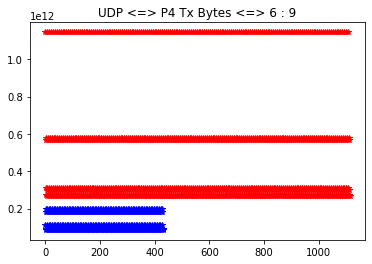

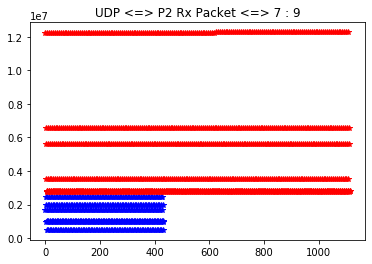

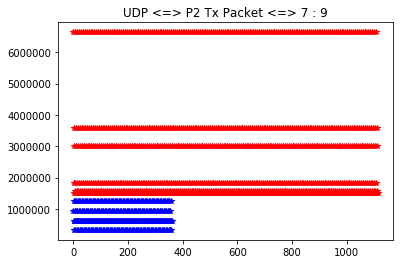

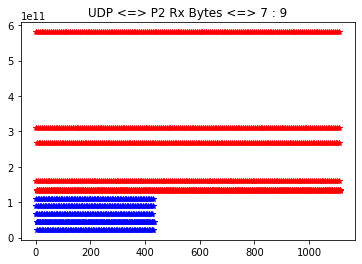

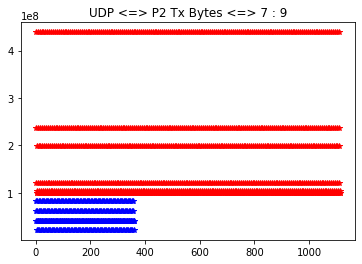

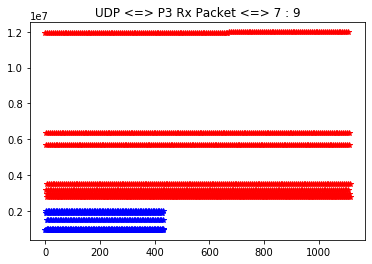

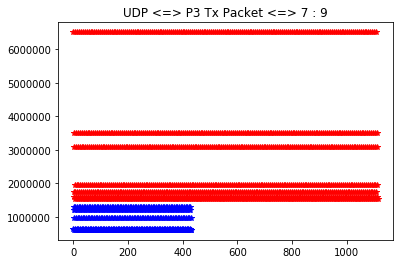

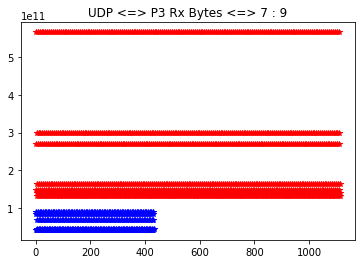

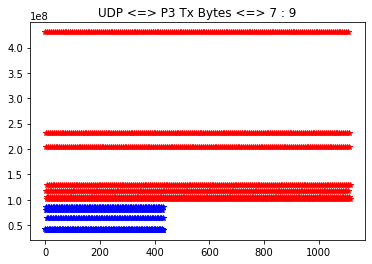

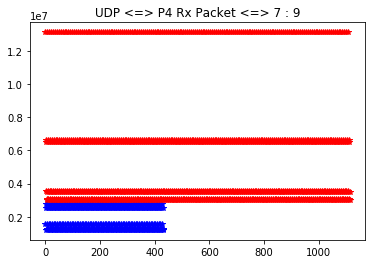

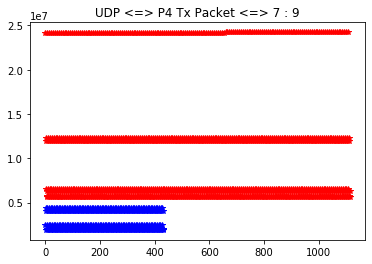

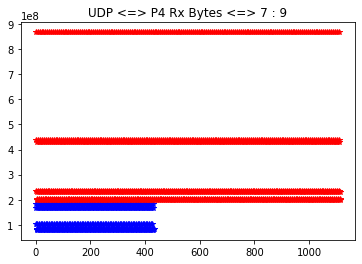

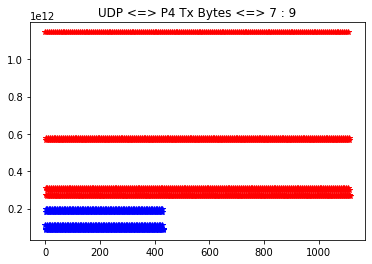

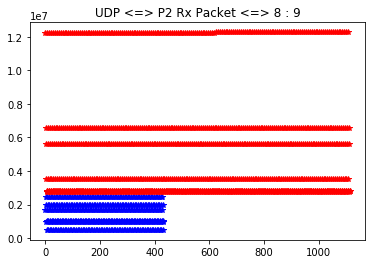

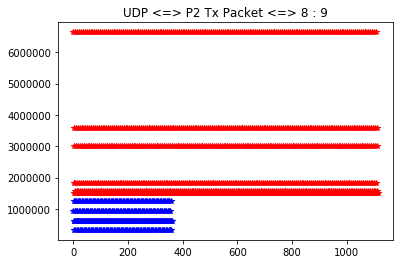

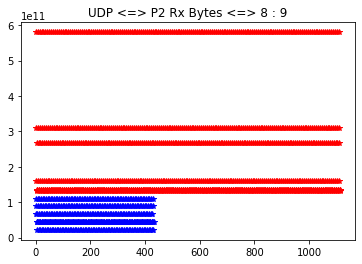

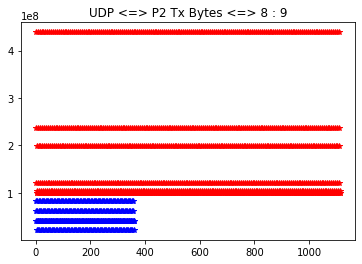

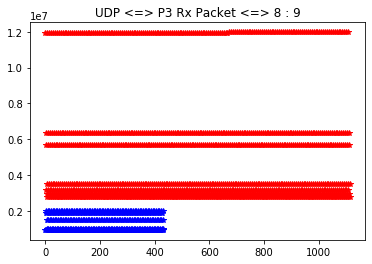

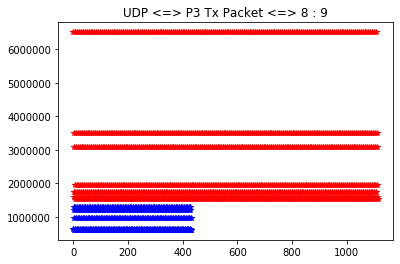

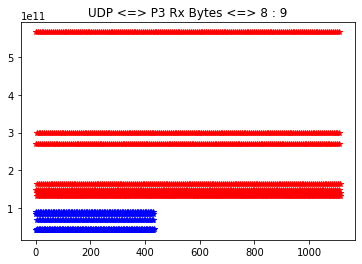

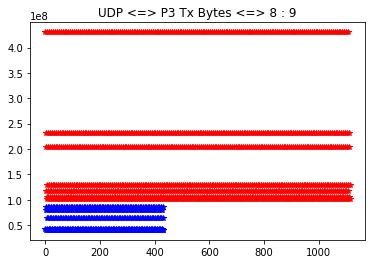

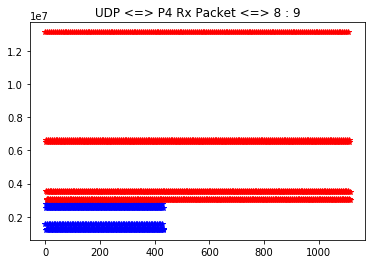

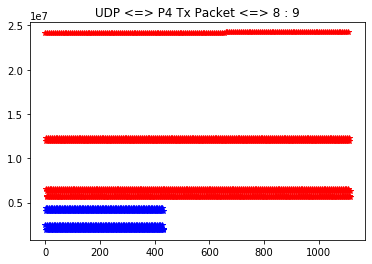

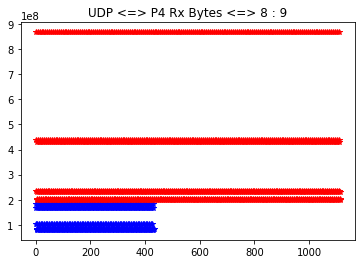

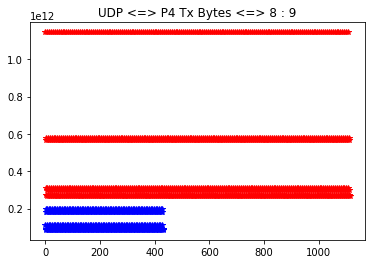

In [59]:
runNodeScenario('UDP', udp)

### ICMP

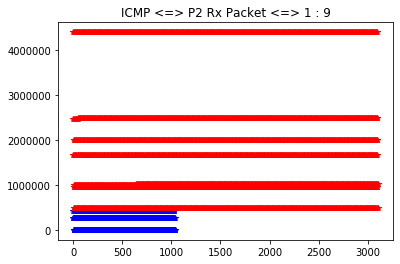

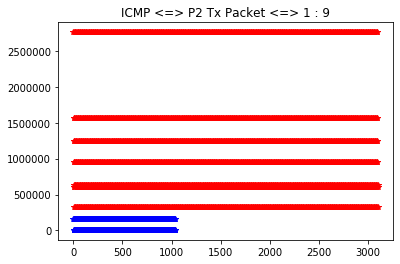

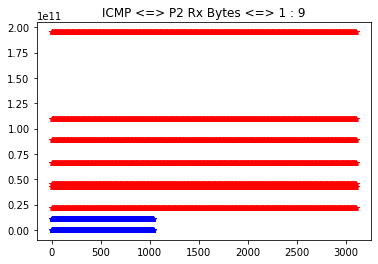

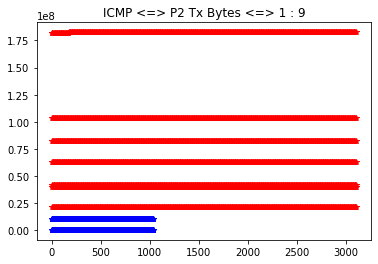

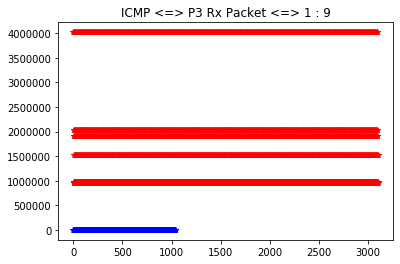

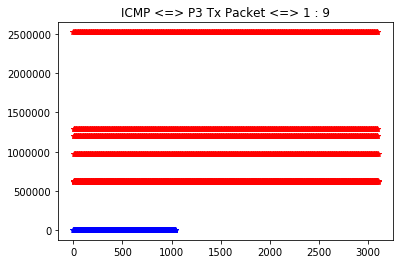

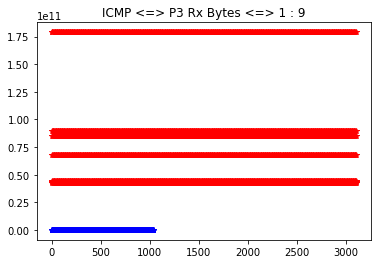

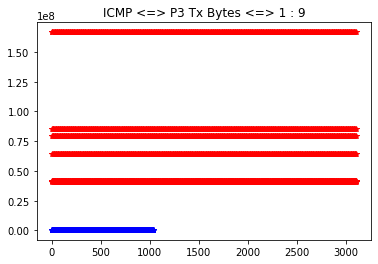

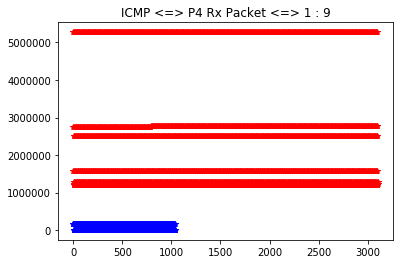

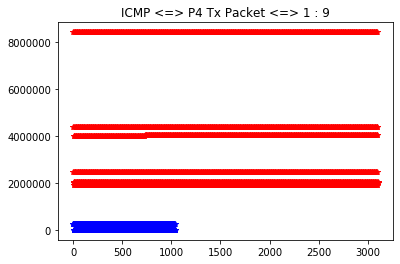

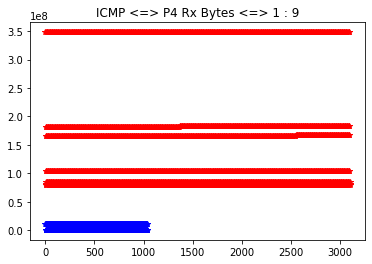

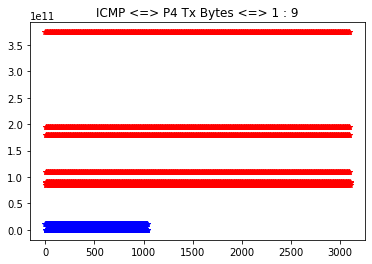

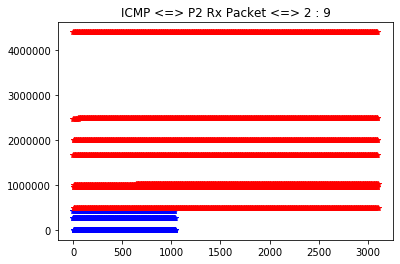

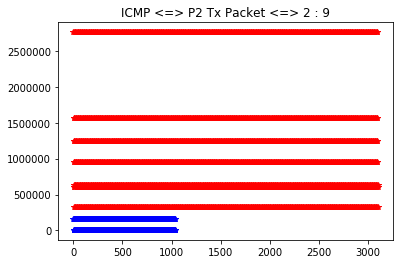

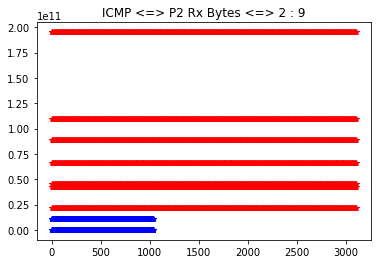

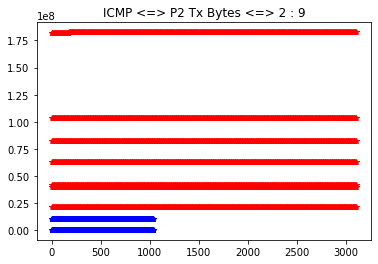

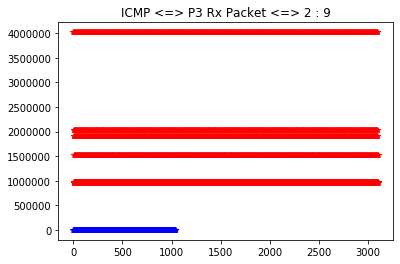

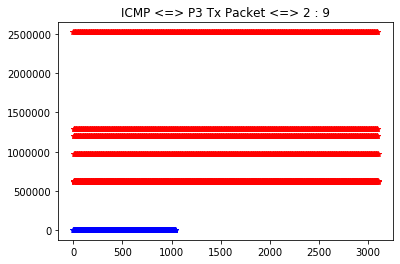

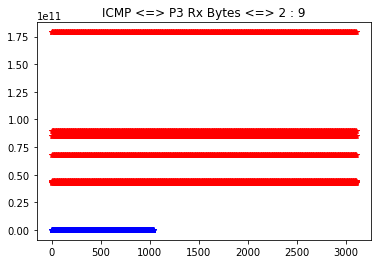

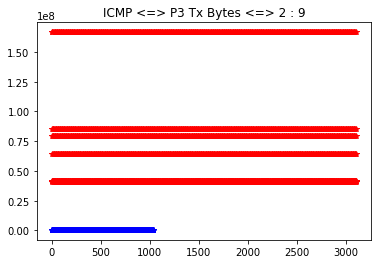

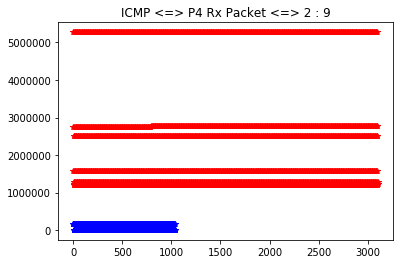

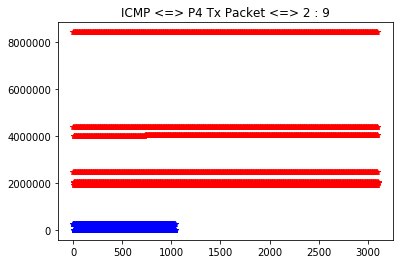

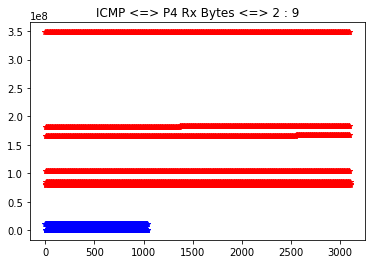

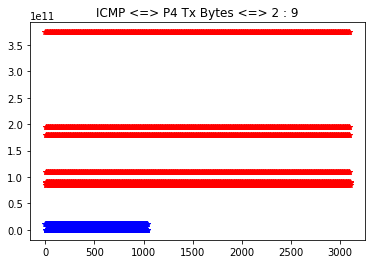

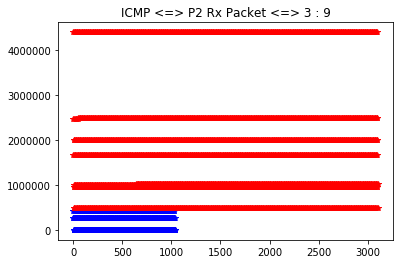

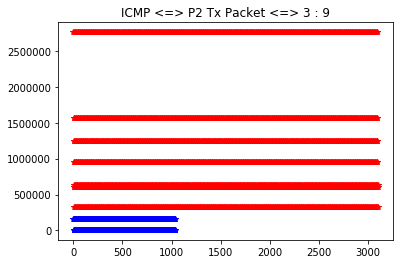

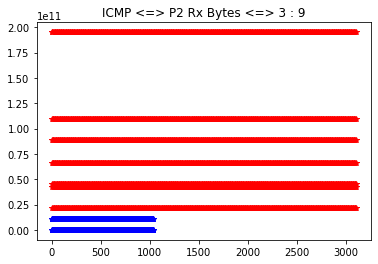

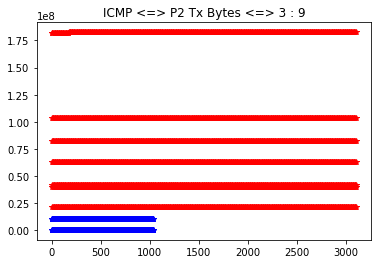

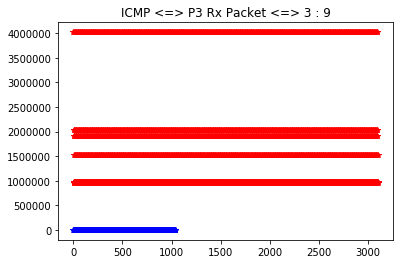

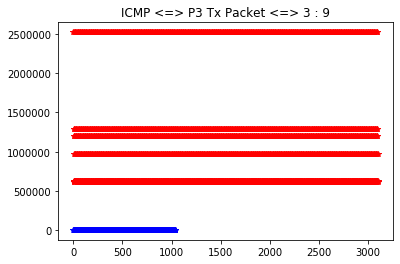

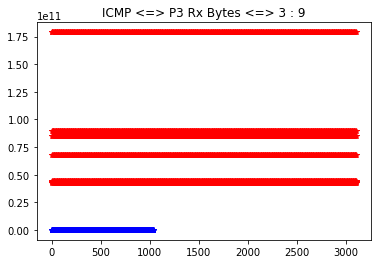

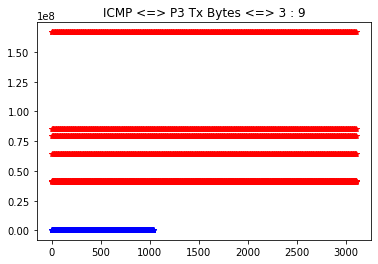

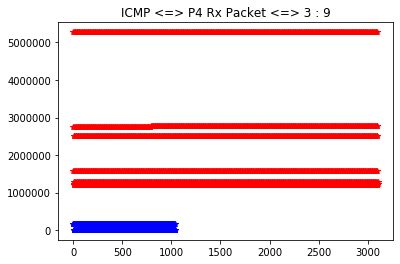

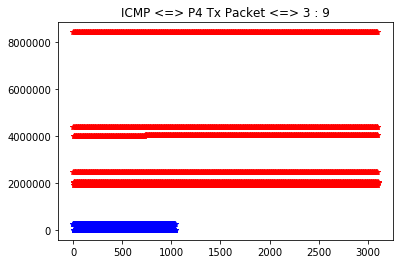

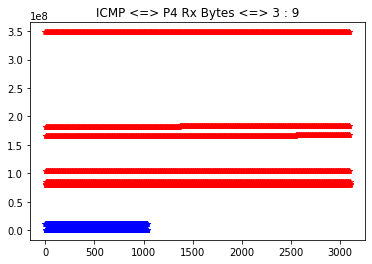

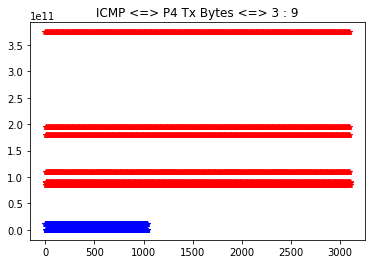

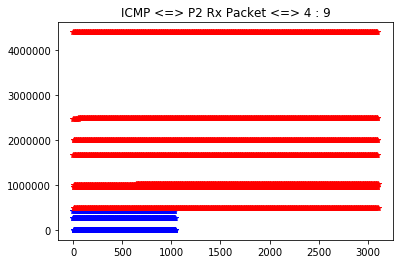

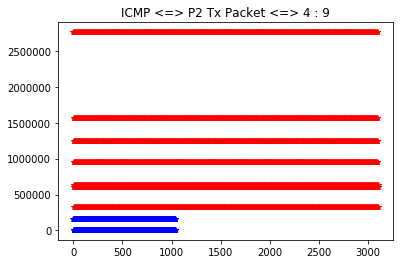

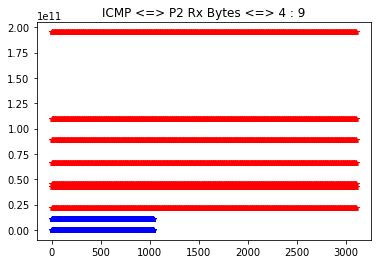

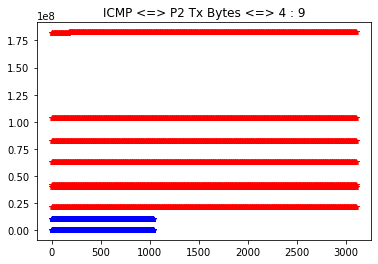

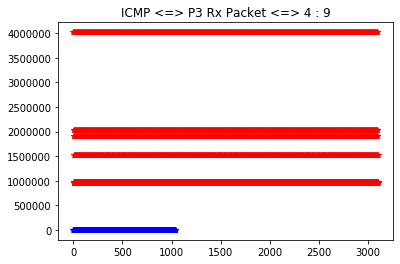

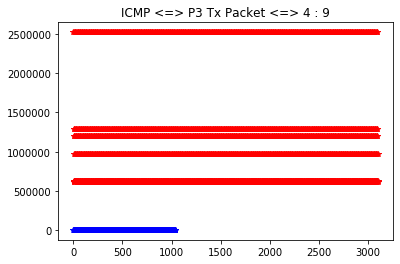

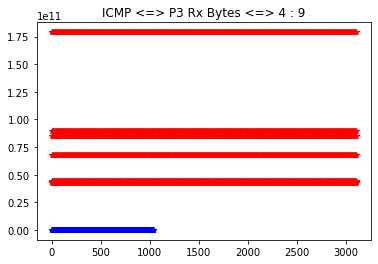

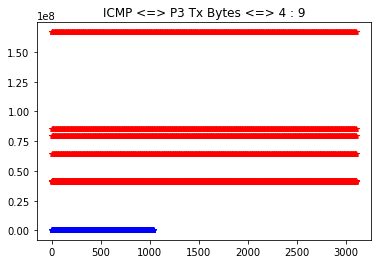

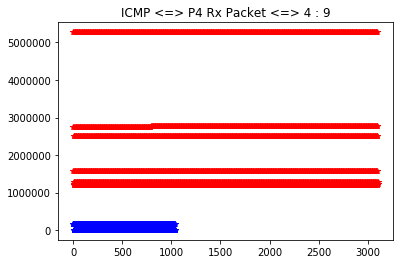

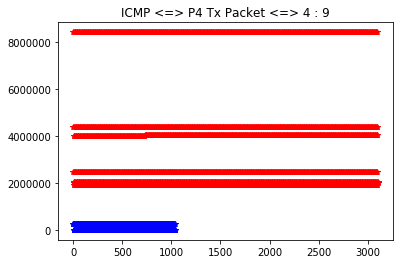

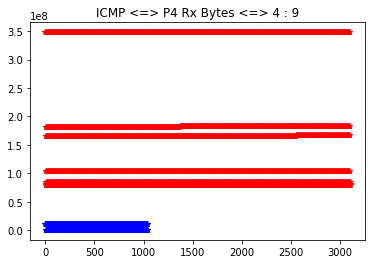

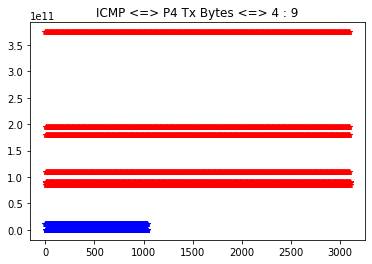

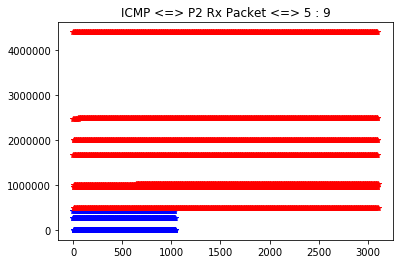

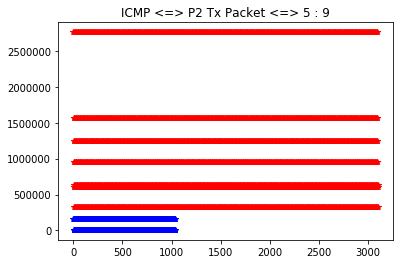

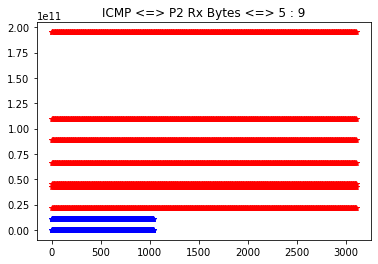

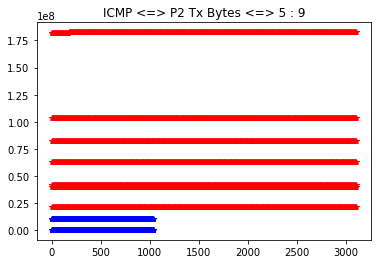

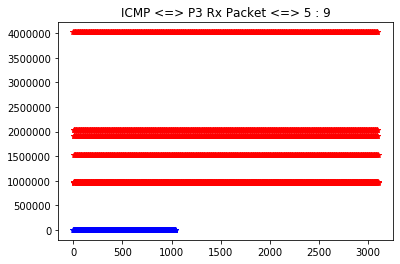

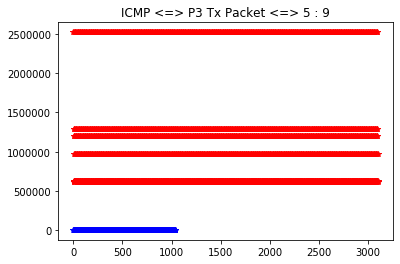

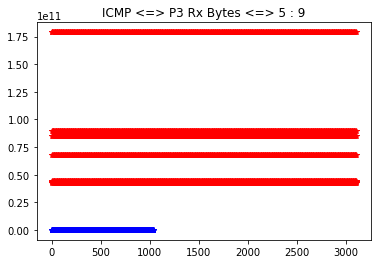

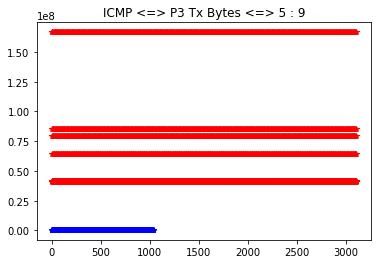

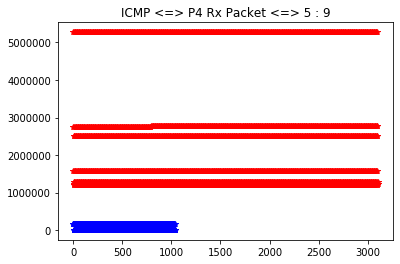

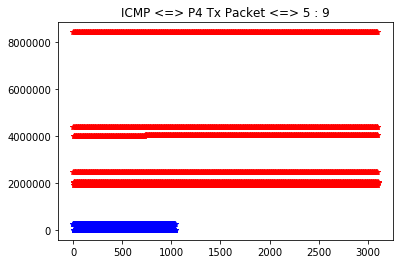

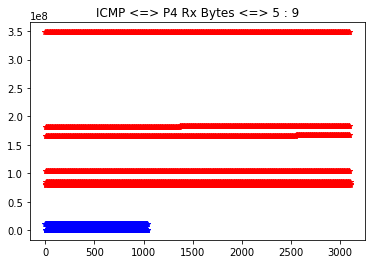

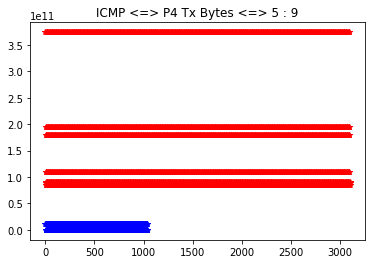

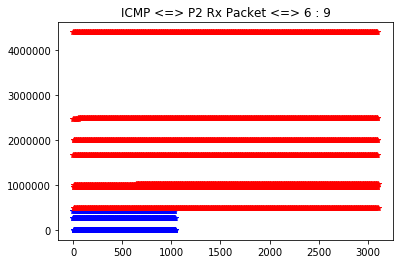

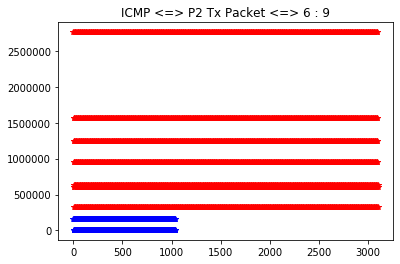

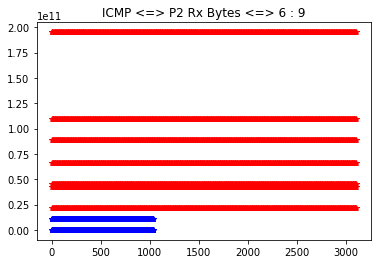

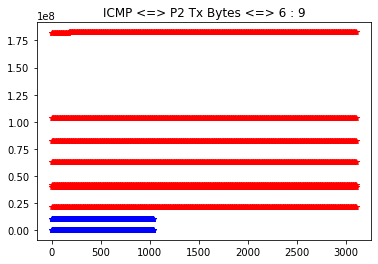

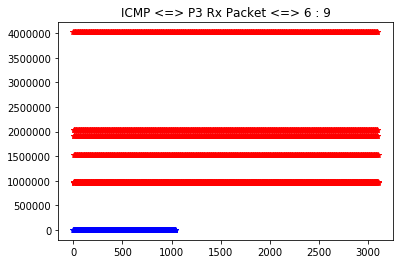

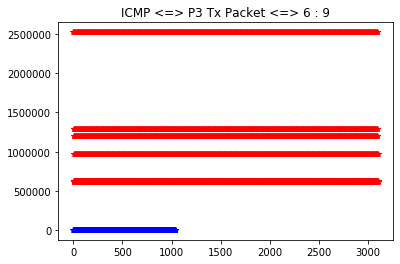

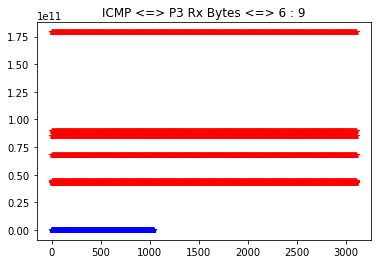

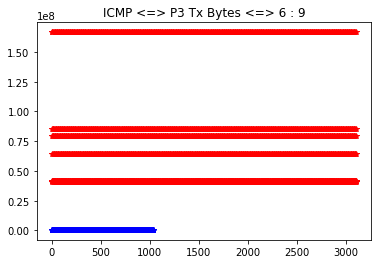

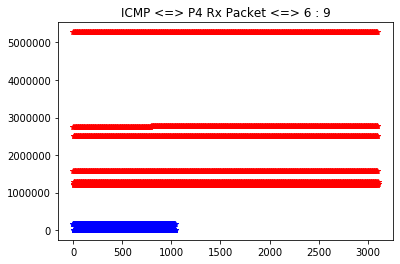

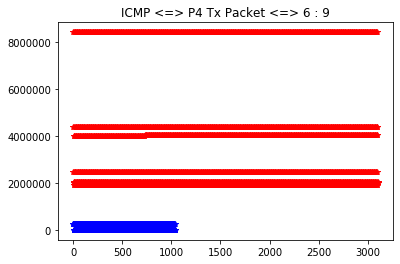

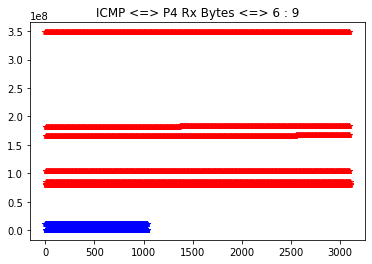

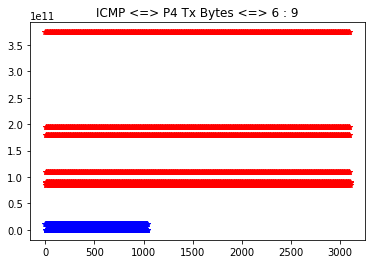

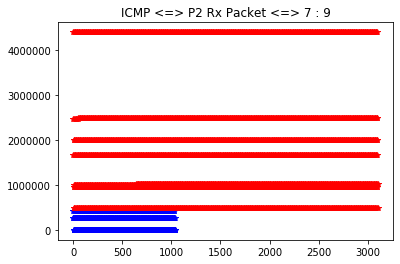

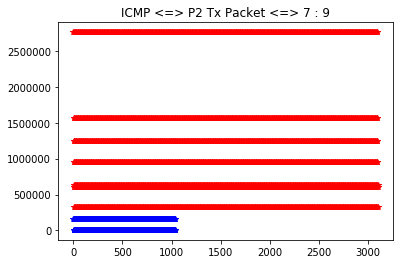

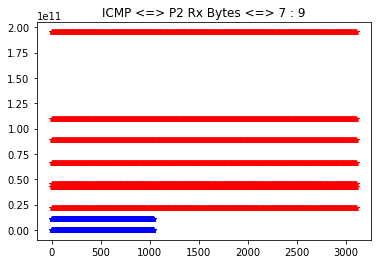

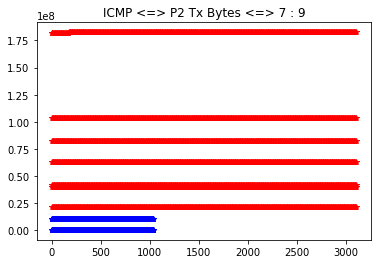

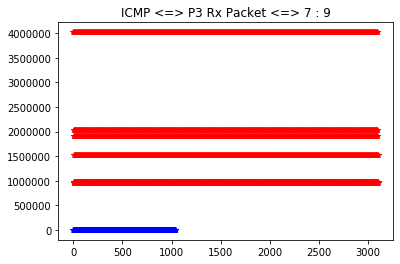

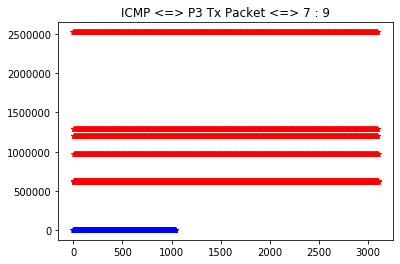

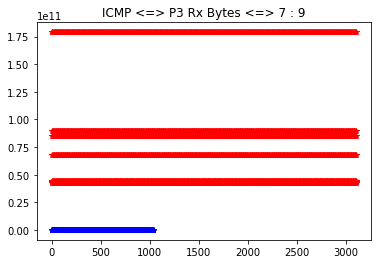

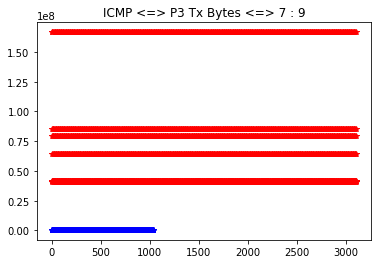

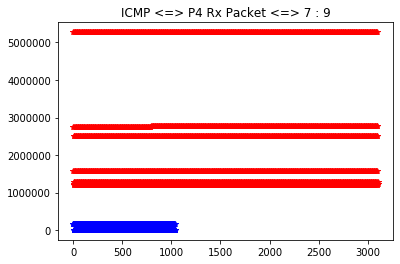

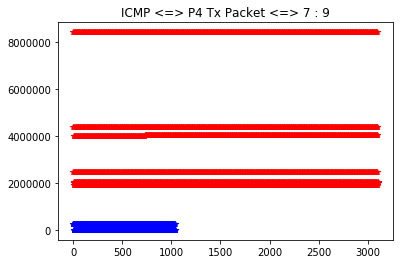

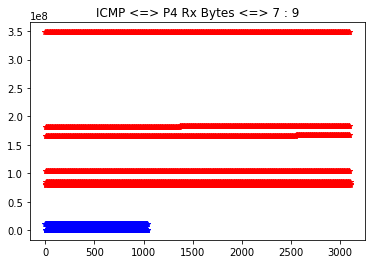

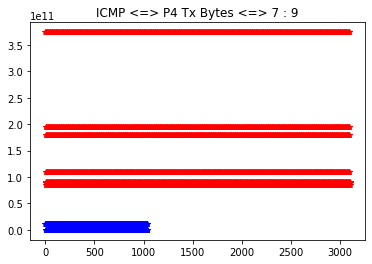

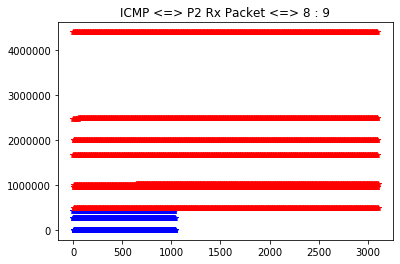

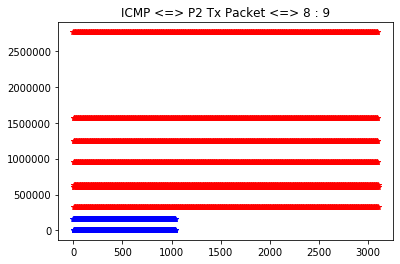

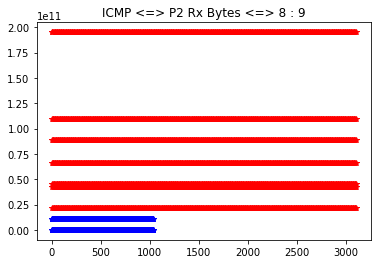

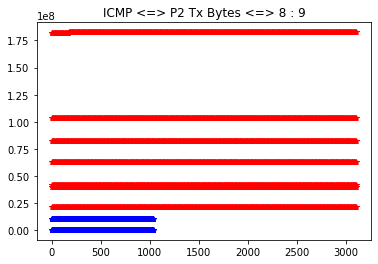

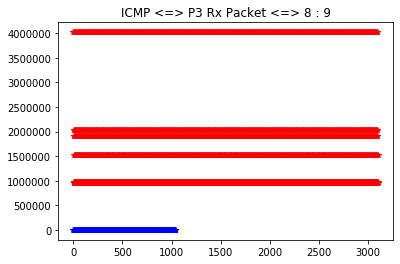

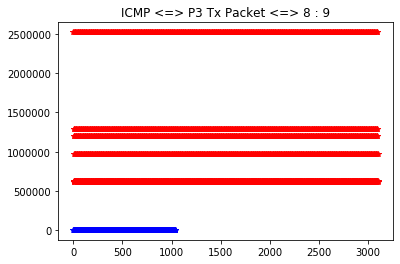

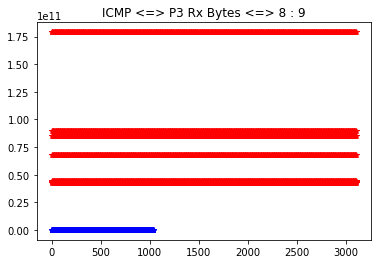

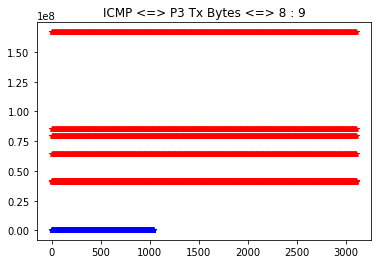

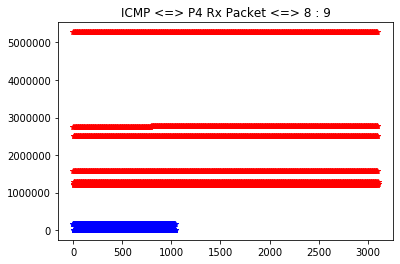

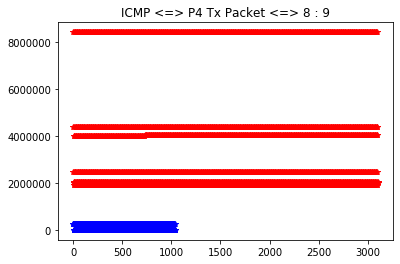

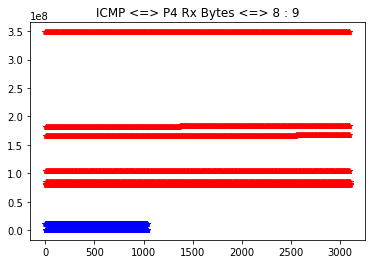

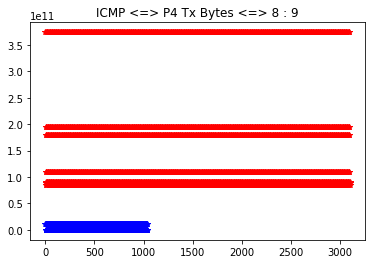

In [60]:
runNodeScenario('ICMP', icmp)